In [1]:
import numpy as np

bkg = np.load('../data/x_data_bkg.npy')
label_sig = np.zeros((np.shape(bkg)[0],1))
bkg = np.append(bkg,label_sig,axis=1)

In [3]:
sig = np.load('../data/x_data_sig.npy')
label_sig = np.ones((np.shape(sig)[0],1))
sig = np.append(sig,label_sig,axis=1)

In [4]:
data = np.append(bkg[:500000],sig[:500000],axis=0)

from sklearn.utils import shuffle

data = shuffle(data)


In [6]:
np.save('../data/x_data_not_normalized.npy',data)

In [9]:
for i in range(np.shape(data)[1] - 1):
    minimo = np.min(data[:,i])
    massimo = np.max(data[:,i])

    data[:,i] = -1 + 2*(data[:,i] - minimo)/(massimo - minimo)

In [10]:
np.save('../data/x_data_normalized.npy',data)

(array([ 32025.,  65795., 103974., 140062., 159260., 159804., 138791.,
        103197.,  64982.,  32110.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

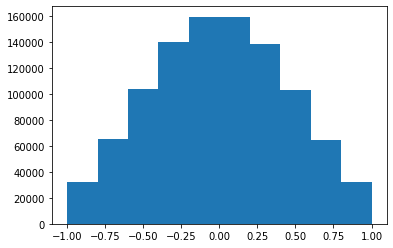

In [15]:
import matplotlib.pyplot as plt
plt.hist(data[:,1])

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


In [3]:
data = np.load('../../data/x_data_normalized.npy')

In [4]:
x = data[:,:-1]
y = data[:,-1]

In [6]:
d = []
for i in range(len(x[0,:])):
    col = x[:,i]*0.5 + 1
    score = roc_auc_score(y,col)
    score = max(score,1-score)
    d.append([i,score])
    print(f"feature {i} auc_score = {score}")

feature 0 auc_score = 0.6193659971699998
feature 1 auc_score = 0.50044365327
feature 2 auc_score = 0.5011251255840001
feature 3 auc_score = 0.577631024526
feature 4 auc_score = 0.5011577642079998
feature 5 auc_score = 0.501006582342
feature 6 auc_score = 0.5001724440159999
feature 7 auc_score = 0.504995
feature 8 auc_score = 0.6248527757240001
feature 9 auc_score = 0.5011525028019999
feature 10 auc_score = 0.500168410738
feature 11 auc_score = 0.575161923274
feature 12 auc_score = 0.500213190942
feature 13 auc_score = 0.5002613555919999
feature 14 auc_score = 0.500933114088
feature 15 auc_score = 0.525725
feature 16 auc_score = 0.6371043653199999
feature 17 auc_score = 0.5010807713380001
feature 18 auc_score = 0.5003084196380001
feature 19 auc_score = 0.5749223019680001
feature 20 auc_score = 0.500006590868
feature 21 auc_score = 0.50061000034
feature 22 auc_score = 0.5011311424320001
feature 23 auc_score = 0.536203
feature 24 auc_score = 0.642197553226
feature 25 auc_score = 0.5011401

In [16]:
from sklearn.decomposition import PCA

transformer = PCA(n_components=16)
x_tf = transformer.fit_transform(x)
d2 = []
for i in range(len(x_tf[0,:])):
    col = x_tf[:,i]*0.5 + 1
    score = roc_auc_score(y,col)
    d2.append([i,score])
    print(f"feature {i} auc_score = {score}")


feature 0 auc_score = 0.5295692952119999
feature 1 auc_score = 0.5152447659
feature 2 auc_score = 0.5209084939159998
feature 3 auc_score = 0.5164351636519999
feature 4 auc_score = 0.5022137415959999
feature 5 auc_score = 0.45770779711200016
feature 6 auc_score = 0.4977487392880002
feature 7 auc_score = 0.4969883893920001
feature 8 auc_score = 0.6451995706039999
feature 9 auc_score = 0.500441281144
feature 10 auc_score = 0.501387231668
feature 11 auc_score = 0.4993200599039999
feature 12 auc_score = 0.5000586843239999
feature 13 auc_score = 0.49955073901200014
feature 14 auc_score = 0.499004462484
feature 15 auc_score = 0.49929239432400013


In [31]:
from operator import itemgetter
sd = sorted(d, key = itemgetter(1), reverse = True)

In [34]:
features=[r[0] for r in sd[:16]]

In [39]:
print(features )

[32, 24, 40, 16, 8, 0, 48, 3, 51, 11, 19, 43, 27, 35, 57, 47]


In [37]:
np.shape(x[:,features])

(1000000, 16)